In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Load Dataset
df = pd.read_csv('Airbnb_data.csv')
df.head() # Showing first 5 Rows of the Data.

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


# 1. Data Exploration And Preprocessing

In [7]:
df.info() #Basic information about data.
df.describe() #Summary statistics of the Data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74110 entries, 0 to 74109
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74110 non-null  int64  
 1   log_price               74110 non-null  float64
 2   property_type           74110 non-null  object 
 3   room_type               74110 non-null  object 
 4   amenities               74110 non-null  object 
 5   accommodates            74110 non-null  int64  
 6   bathrooms               73910 non-null  float64
 7   bed_type                74110 non-null  object 
 8   cancellation_policy     74110 non-null  object 
 9   cleaning_fee            74110 non-null  bool   
 10  city                    74110 non-null  object 
 11  description             74110 non-null  object 
 12  first_review            58246 non-null  object 
 13  host_has_profile_pic    73922 non-null  object 
 14  host_identity_verified  73922 non-null

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411000e+04,74110.000000,74110.000000,73910.000000,74110.000000,74110.000000,74110.000000,57388.000000,74019.000000,73979.000000
mean,1.126661e+07,4.782078,3.155175,1.235266,38.446018,-92.397182,20.900837,94.067261,1.265797,1.710877
std,6.081776e+06,0.717394,2.153589,0.582047,3.080144,21.705267,37.828826,7.836585,0.852149,1.254148
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261961e+06,4.317488,2.000000,1.000000,34.127909,-118.342380,1.000000,92.000000,1.000000,1.000000
50%,1.225416e+07,4.709530,2.000000,1.000000,40.662139,-76.996956,6.000000,96.000000,1.000000,1.000000
75%,1.640230e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [8]:
#Handle missing values
df_clean = df.copy()

#Fill number_of_reviews missing with 0
df_clean['number_of_reviews'] = df_clean['number_of_reviews'].fillna(0)

# Fill latitude/longitude missing with median if any (safety check)
df_clean['latitude'] = df_clean['latitude'].fillna(df_clean['latitude'].median())
df_clean['longitude'] = df_clean['longitude'].fillna(df_clean['longitude'].median())

#Fill property_type and room_type with 'Unknown'
df_clean['property_type'] = df_clean['property_type'].fillna('Unknown')
df_clean['room_type'] = df_clean['room_type'].fillna('Unknown')

#Feature Engineering

# Convert amenities to count
df_clean['amenities_count'] = df_clean['amenities'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

#Select only the relevant columns
selected_cols = ['log_price', 'property_type', 'room_type', 'amenities_count', 'latitude', 'longitude', 'number_of_reviews']
df_model = df_clean[selected_cols].copy()

#Encode categorical features
df_model = pd.get_dummies(df_model, columns=['property_type', 'room_type'], drop_first=True)


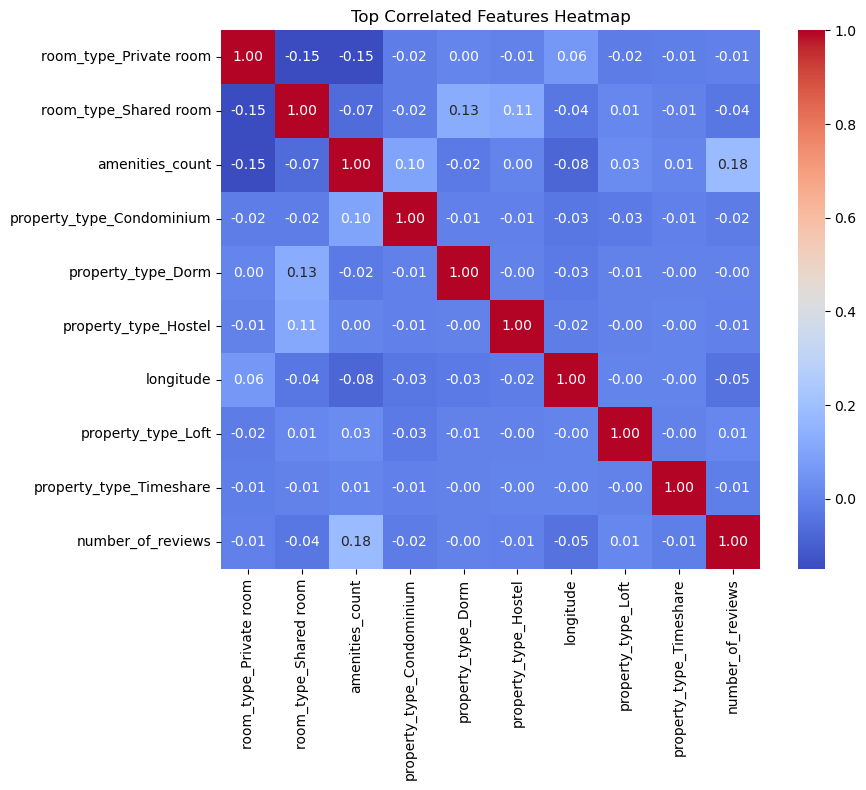

In [11]:
#Explore Data Analysis (EDA)

corr_matrix = df_model.corr(numeric_only=True) #Correlation matrix.
top_corr = corr_matrix['log_price'].abs().sort_values(ascending=False)[1:11].index #Get top 10 features most correlated with log_price (excluding itself).
top_corr_matrix = corr_matrix.loc[top_corr, top_corr] # Subset the matrix.

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Top Correlated Features Heatmap')
plt.tight_layout()
plt.show()


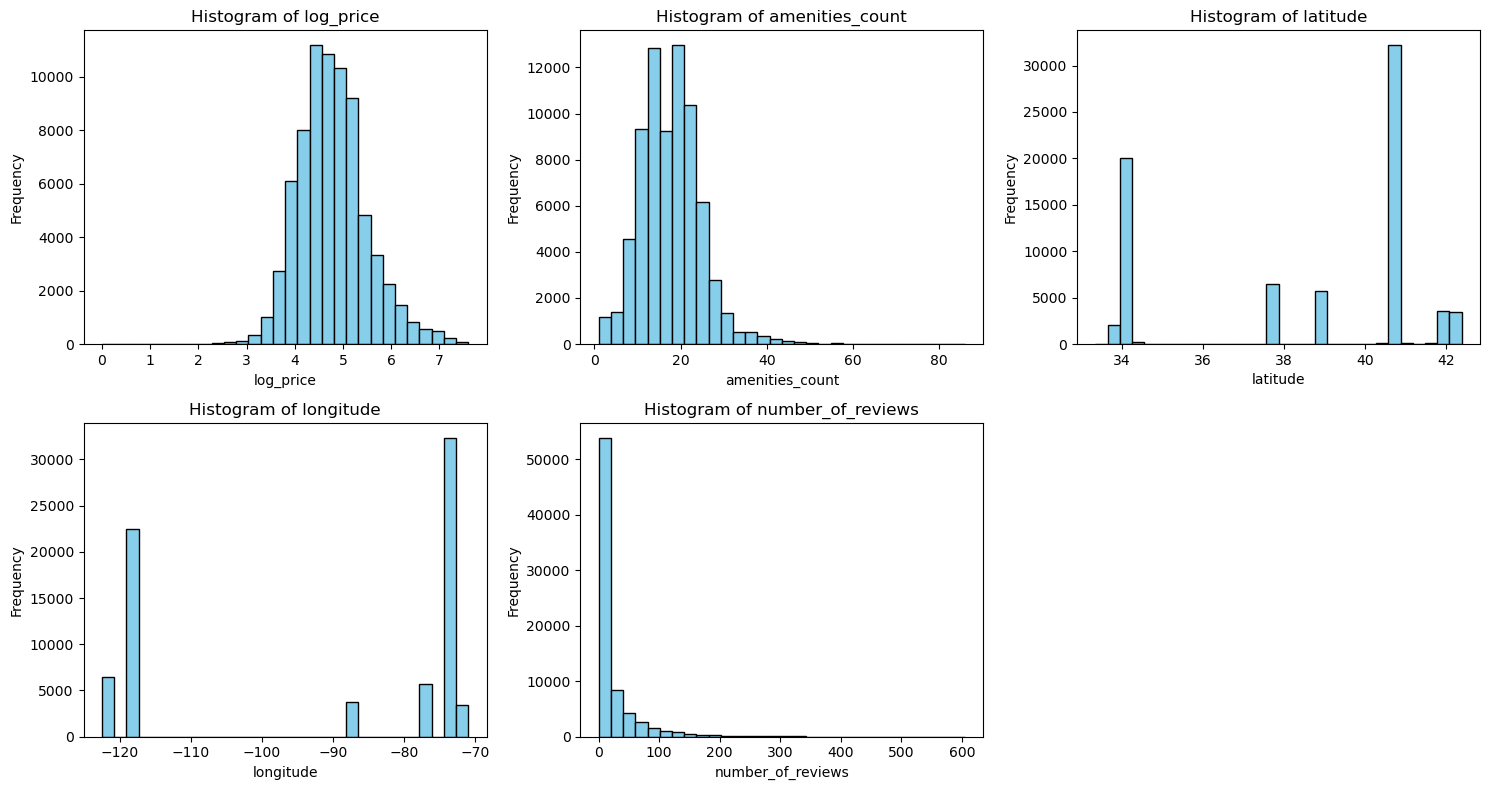

In [12]:
#Histogram of Indiviual Features

hist_cols = ['log_price', 'amenities_count', 'latitude', 'longitude', 'number_of_reviews'] #Select the numeric columns you want to plot.

plt.figure(figsize=(15, 8)) # Set up the subplot grid: 3 plots per row.

for i, col in enumerate(hist_cols, 1):
    plt.subplot(2, 3, i)  
    plt.hist(df_model[col], bins=30, edgecolor='black', color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

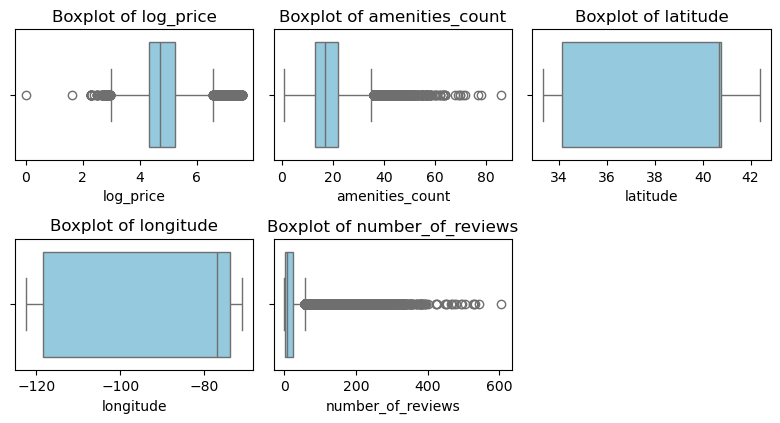

In [13]:
# Box plots for outlier detection
numeric_cols = ['log_price', 'amenities_count', 'latitude', 'longitude', 'number_of_reviews']

plt.figure(figsize=(8, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_model[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 2. Data Development:

In [14]:
#Define the Traget Variable & The Predictor Variable
X = df_model.drop(columns=['log_price']) #Predictor.
y = df_model['log_price'] #Traget.

#Split the dataset into training & testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create & Train the model
model = LinearRegression()
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

# 3. Model Evaluation:

In [15]:
# Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation (Target: log_price):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation (Target: log_price):
RMSE: 0.5512
MAE: 0.4151
R² Score: 0.4121


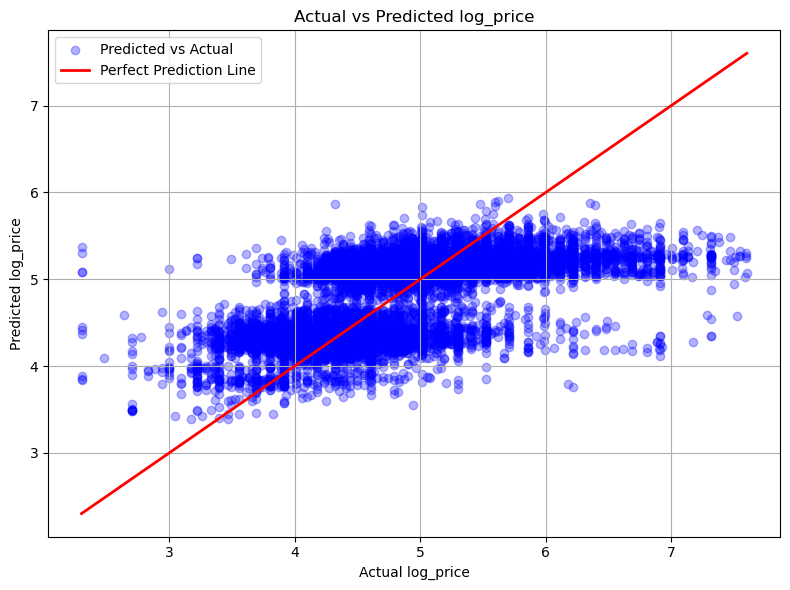

In [16]:
#Plot The Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', lw=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted log_price')
plt.xlabel('Actual log_price')
plt.ylabel('Predicted log_price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()